In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seoul2021.csv')
df.head(1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391.0,25502,...,157,15667,7253,108,1098,2013,4344,7792,7568,28


In [ ]:
#대분류(외식,서비스,소매)로 나누기
df.loc[df['서비스_업종_코드'].str.contains('CS1'),'분류'] = '외식업'
df.loc[df['서비스_업종_코드'].str.contains('CS2'),'분류'] = '서비스업'
df.loc[df['서비스_업종_코드'].str.contains('CS3'),'분류'] = '소매업'
df.head(1)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,분류
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391.0,25502,...,15667,7253,108,1098,2013,4344,7792,7568,28,외식업


In [ ]:
#필요한 열만 가져오기

food = df[df['분류']=='외식업']

food = food[['상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명', '주중_매출_건수', '주말_매출_건수',
             '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수',
             '남성_매출_건수', '여성_매출_건수',
             '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수','연령대_50_매출_건수', '연령대_60_이상_매출_건수' ]]
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36696 entries, 0 to 140802
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   상권_구분_코드_명       36696 non-null  object
 1   상권_코드_명          36696 non-null  object
 2   서비스_업종_코드_명      36696 non-null  object
 3   주중_매출_건수         36696 non-null  int64 
 4   주말_매출_건수         36696 non-null  int64 
 5   시간대_건수~06_매출_건수  36696 non-null  int64 
 6   시간대_건수~11_매출_건수  36696 non-null  int64 
 7   시간대_건수~14_매출_건수  36696 non-null  int64 
 8   시간대_건수~17_매출_건수  36696 non-null  int64 
 9   시간대_건수~21_매출_건수  36696 non-null  int64 
 10  시간대_건수~24_매출_건수  36696 non-null  int64 
 11  남성_매출_건수         36696 non-null  int64 
 12  여성_매출_건수         36696 non-null  int64 
 13  연령대_10_매출_건수     36696 non-null  int64 
 14  연령대_20_매출_건수     36696 non-null  int64 
 15  연령대_30_매출_건수     36696 non-null  int64 
 16  연령대_40_매출_건수     36696 non-null  int64 
 17  연령대_50_매출_건수     36696 non-nul

In [ ]:
#분기당 합쳐서 1년 건수
year_number = food.groupby(['상권_구분_코드_명','상권_코드_명','서비스_업종_코드_명']).sum().reset_index()
year_number

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,주중_매출_건수,주말_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,골목상권,4.19민주묘지역 2번,분식전문점,37218,23573,0,2208,22352,14506,20660,1065,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,4.19민주묘지역 2번,일식음식점,3549,834,0,6,2394,664,1296,23,1854,2473,114,1670,739,523,729,551
2,골목상권,4.19민주묘지역 2번,치킨전문점,5843,3380,14,0,416,911,5443,2439,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,4.19민주묘지역 2번,커피-음료,119165,63142,66,23705,44283,57284,47722,9247,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,4.19민주묘지역 2번,한식음식점,72795,42203,18,4066,37327,23062,45191,5334,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,후암시장,커피-음료,9812,1497,0,404,8522,1509,860,14,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,후암시장,한식음식점,57868,13958,520,1197,26472,6734,30575,6328,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,후암시장,호프-간이주점,203,86,6,0,0,0,84,199,74,160,0,10,27,22,154,20
9461,전통시장,흑석시장,양식음식점,17593,6470,0,853,11421,7290,4499,0,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
#열이름 바꾸기
year_number.columns = ['상권', '지역', '업종', '주중', '주말', '0시~6시', '6시~11시', '11시~14시', '14시~17시', '17시~21시','21시~24시', '남성', '여성', '10대', '20대', '30대', '40대','50대','60대이상']
year_number

,상권,지역,업종,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,골목상권,4.19민주묘지역 2번,분식전문점,37218,23573,0,2208,22352,14506,20660,1065,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,4.19민주묘지역 2번,일식음식점,3549,834,0,6,2394,664,1296,23,1854,2473,114,1670,739,523,729,551
2,골목상권,4.19민주묘지역 2번,치킨전문점,5843,3380,14,0,416,911,5443,2439,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,4.19민주묘지역 2번,커피-음료,119165,63142,66,23705,44283,57284,47722,9247,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,4.19민주묘지역 2번,한식음식점,72795,42203,18,4066,37327,23062,45191,5334,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,후암시장,커피-음료,9812,1497,0,404,8522,1509,860,14,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,후암시장,한식음식점,57868,13958,520,1197,26472,6734,30575,6328,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,후암시장,호프-간이주점,203,86,6,0,0,0,84,199,74,160,0,10,27,22,154,20
9461,전통시장,흑석시장,양식음식점,17593,6470,0,853,11421,7290,4499,0,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
# 주중/5, 주말/2
year_number['주중'] = year_number['주중']/5
year_number['주말'] = year_number['주말']/2
year_number= year_number.drop(columns = ['업종'])
year_number

,상권,지역,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,골목상권,4.19민주묘지역 2번,7443.6,11786.5,0,2208,22352,14506,20660,1065,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,4.19민주묘지역 2번,709.8,417.0,0,6,2394,664,1296,23,1854,2473,114,1670,739,523,729,551
2,골목상권,4.19민주묘지역 2번,1168.6,1690.0,14,0,416,911,5443,2439,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,4.19민주묘지역 2번,23833.0,31571.0,66,23705,44283,57284,47722,9247,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,4.19민주묘지역 2번,14559.0,21101.5,18,4066,37327,23062,45191,5334,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,후암시장,1962.4,748.5,0,404,8522,1509,860,14,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,후암시장,11573.6,6979.0,520,1197,26472,6734,30575,6328,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,후암시장,40.6,43.0,6,0,0,0,84,199,74,160,0,10,27,22,154,20
9461,전통시장,흑석시장,3518.6,3235.0,0,853,11421,7290,4499,0,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
#시간대로 나눠주기
year_number['0시~6시'] = year_number['0시~6시']/6
year_number['6시~11시'] = year_number['6시~11시']/5
year_number['11시~14시'] = year_number['11시~14시']/3
year_number['14시~17시'] = year_number['14시~17시']/3
year_number['17시~21시'] = year_number['17시~21시']/4
year_number['21시~24시'] = year_number['21시~24시']/3
year_number

,상권,지역,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,골목상권,4.19민주묘지역 2번,7443.6,11786.5,0.000000,441.6,7450.666667,4835.333333,5165.00,355.000000,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,4.19민주묘지역 2번,709.8,417.0,0.000000,1.2,798.000000,221.333333,324.00,7.666667,1854,2473,114,1670,739,523,729,551
2,골목상권,4.19민주묘지역 2번,1168.6,1690.0,2.333333,0.0,138.666667,303.666667,1360.75,813.000000,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,4.19민주묘지역 2번,23833.0,31571.0,11.000000,4741.0,14761.000000,19094.666667,11930.50,3082.333333,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,4.19민주묘지역 2번,14559.0,21101.5,3.000000,813.2,12442.333333,7687.333333,11297.75,1778.000000,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,후암시장,1962.4,748.5,0.000000,80.8,2840.666667,503.000000,215.00,4.666667,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,후암시장,11573.6,6979.0,86.666667,239.4,8824.000000,2244.666667,7643.75,2109.333333,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,후암시장,40.6,43.0,1.000000,0.0,0.000000,0.000000,21.00,66.333333,74,160,0,10,27,22,154,20
9461,전통시장,흑석시장,3518.6,3235.0,0.000000,170.6,3807.000000,2430.000000,1124.75,0.000000,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
#데이터 섞기
year_number=year_number.sample(frac=1).reset_index(drop=True)
year_number

,상권,지역,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,골목상권,장평중학교,3605.8,2128.0,10.333333,943.2,2624.333333,1725.333333,894.00,294.000000,10944,10727,286,5059,6629,5493,2955,1263
1,골목상권,쌍문2동우체국,4067.2,3992.5,74.666667,789.4,676.000000,1169.333333,3204.50,1857.333333,11636,16442,163,2819,5049,8213,6290,5546
2,골목상권,광진정보도서관,15935.8,17438.5,609.166667,1626.6,8770.000000,6681.666667,9157.75,6594.000000,54196,50671,6796,18647,23189,24681,20103,11446
3,골목상권,후암동주민센터,3389.0,5106.0,0.000000,4.2,4446.333333,1399.333333,2346.25,71.333333,14730,9325,264,2203,5790,5830,6386,3586
4,발달상권,북촌(안국역),3342.8,626.5,0.000000,1.2,3964.666667,805.333333,869.00,58.333333,10446,4144,537,1639,3772,4306,2930,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,골목상권,중랑역 4번,9730.4,9790.0,20.166667,173.6,7107.666667,3425.666667,7705.00,1607.666667,39854,27447,130,7635,10543,12468,17664,18863
9459,골목상권,방화역 1번,11978.6,17346.0,0.000000,4.8,15671.666667,6915.666667,6699.75,0.000000,58077,27382,748,11378,25589,23991,15469,8279
9460,골목상권,강남구청역 4번,1441.6,452.5,0.000000,526.6,1089.666667,618.666667,87.00,2.333333,2563,5223,2,2734,1840,2177,784,251
9461,골목상권,하나은행 망우동지점,28654.0,39214.0,473.500000,455.6,17507.666667,12061.666667,25187.00,9041.000000,130758,83730,386,19108,33256,40212,61166,60361


In [ ]:
year_number['상권'].value_counts()

골목상권    5739
발달상권    2207
전통시장    1459
관광특구      58
Name: 상권, dtype: int64

In [ ]:
X = year_number.drop(columns=['상권'])
Y = year_number['상권']
print(X.shape, Y.shape)

(9463, 17) (9463,)


In [ ]:
X['지역'] = X['지역'].astype('category').cat.codes
X

,지역,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,1345,3605.8,2128.0,10.333333,943.2,2624.333333,1725.333333,894.00,294.000000,10944,10727,286,5059,6629,5493,2955,1263
1,1056,4067.2,3992.5,74.666667,789.4,676.000000,1169.333333,3204.50,1857.333333,11636,16442,163,2819,5049,8213,6290,5546
2,169,15935.8,17438.5,609.166667,1626.6,8770.000000,6681.666667,9157.75,6594.000000,54196,50671,6796,18647,23189,24681,20103,11446
3,1600,3389.0,5106.0,0.000000,4.2,4446.333333,1399.333333,2346.25,71.333333,14730,9325,264,2203,5790,5830,6386,3586
4,671,3342.8,626.5,0.000000,1.2,3964.666667,805.333333,869.00,58.333333,10446,4144,537,1639,3772,4306,2930,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,1404,9730.4,9790.0,20.166667,173.6,7107.666667,3425.666667,7705.00,1607.666667,39854,27447,130,7635,10543,12468,17664,18863
9459,625,11978.6,17346.0,0.000000,4.8,15671.666667,6915.666667,6699.75,0.000000,58077,27382,748,11378,25589,23991,15469,8279
9460,45,1441.6,452.5,0.000000,526.6,1089.666667,618.666667,87.00,2.333333,2563,5223,2,2734,1840,2177,784,251
9461,1503,28654.0,39214.0,473.500000,455.6,17507.666667,12061.666667,25187.00,9041.000000,130758,83730,386,19108,33256,40212,61166,60361


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = ['주중', '주말', '0시~6시', '6시~11시', '11시~14시', '14시~17시', '17시~21시','21시~24시', '남성', '여성', '10대', '20대', '30대', '40대', '50대', '60대이상']
X[scaler] = MinMaxScaler().fit_transform(X[scaler])
X

,지역,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,1345,0.002209,0.002558,0.000672,0.001306,0.002188,0.002998,0.001496,0.000843,0.002442,0.002471,0.001235,0.001648,0.002265,0.002993,0.002894,0.002214
1,1056,0.002492,0.004799,0.004856,0.001093,0.000564,0.002032,0.005362,0.005324,0.002596,0.003788,0.000704,0.000919,0.001725,0.004476,0.006160,0.009722
2,169,0.009763,0.020960,0.039616,0.002252,0.007312,0.011609,0.015324,0.018901,0.012093,0.011673,0.029352,0.006076,0.007922,0.013450,0.019689,0.020065
3,1600,0.002076,0.006137,0.000000,0.000006,0.003707,0.002432,0.003926,0.000204,0.003287,0.002148,0.001140,0.000718,0.001978,0.003177,0.006254,0.006286
4,671,0.002048,0.000753,0.000000,0.000002,0.003306,0.001400,0.001454,0.000167,0.002331,0.000955,0.002319,0.000534,0.001289,0.002347,0.002870,0.002465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,1404,0.005961,0.011767,0.001311,0.000240,0.005926,0.005952,0.012893,0.004608,0.008892,0.006323,0.000561,0.002488,0.003602,0.006794,0.017300,0.033068
9459,625,0.007339,0.020849,0.000000,0.000007,0.013067,0.012016,0.011211,0.000000,0.012959,0.006308,0.003231,0.003707,0.008742,0.013074,0.015150,0.014514
9460,45,0.000883,0.000544,0.000000,0.000729,0.000909,0.001075,0.000146,0.000007,0.000572,0.001203,0.000009,0.000891,0.000629,0.001186,0.000768,0.000440
9461,1503,0.017555,0.047133,0.030793,0.000631,0.014598,0.020956,0.042147,0.025915,0.029176,0.019289,0.001667,0.006226,0.011361,0.021914,0.059905,0.105816


In [ ]:
#오버샘플링해주기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, classification_report
from imblearn.over_sampling import SMOTE

xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,stratify=Y, random_state=3)

smote = SMOTE(random_state=0)
X_over, Y_over = smote.fit_resample(xtrain,ytrain)

print(year_number['상권'].value_counts())
print(Y_over[Y_over=='골목상권'].value_counts())
print(Y_over[Y_over=='발달상권'].value_counts())
print(Y_over[Y_over=='전통시장'].value_counts())
print(Y_over[Y_over=='관광특구'].value_counts())

def get_scores(model, X_over, xtest, Y_over, ytest):
    A = model.score(X_over, Y_over)
    B = model.score(xtest, ytest)
    ypred = model.predict(xtest)
    C = f1_score(ytest, ypred, average='macro')
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

def make_models(X_over, xtest, Y_over, ytest):
    model1 = LogisticRegression(max_iter=5000).fit(X_over, Y_over)
    print('model1', get_scores(model1, X_over, xtest, Y_over, ytest))

    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(X_over, Y_over)
        print('model2', k, get_scores(model2, X_over, xtest, Y_over, ytest))

    model3 = DecisionTreeClassifier(random_state=0).fit(X_over, Y_over)
    print('model3', get_scores(model3, X_over, xtest, Y_over, ytest))
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(X_over, Y_over)
        print('model3', d, get_scores(model3, X_over, xtest, Y_over, ytest)) 

    model4 = RandomForestClassifier(random_state=0).fit(X_over, Y_over)
    print('model4', get_scores(model4, X_over, xtest, Y_over, ytest))
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d,random_state=0).fit(X_over, Y_over)
        print('model4', d, get_scores(model4, X_over, xtest, Y_over, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(X_over, Y_over)
    print('model5', get_scores(model5, X_over, xtest, Y_over, ytest))

make_models(X_over, xtest, Y_over, ytest)


골목상권    5739
발달상권    2207
전통시장    1459
관광특구      58
Name: 상권, dtype: int64
골목상권    4017
Name: 상권, dtype: int64
발달상권    4017
Name: 상권, dtype: int64
전통시장    4017
Name: 상권, dtype: int64
관광특구    4017
Name: 상권, dtype: int64
model1 0.4781 0.4498 0.3111
model2 1 1.0000 0.9514 0.9518
model2 2 0.9823 0.9757 0.9744
model2 3 0.9775 0.9496 0.9517
model2 4 0.9732 0.9595 0.9596
model2 5 0.9678 0.9338 0.9382
model2 6 0.9665 0.9369 0.9407
model2 7 0.9597 0.8979 0.9099
model2 8 0.9585 0.9045 0.9149
model2 9 0.9476 0.8637 0.8831
model3 1.0000 0.5287 0.4316
model3 3 0.5332 0.5097 0.3636
model3 4 0.6026 0.4241 0.3312
model3 5 0.6332 0.4974 0.3824
model3 6 0.6568 0.4618 0.3797
model3 7 0.6928 0.5104 0.4206
model4 1.0000 0.6249 0.5234


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,stratify=Y, random_state=3)

def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict(xtest)
    C = f1_score(ytest, ypred, average='macro')
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression(max_iter=5000).fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest)) 

    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

make_models(xtrain, xtest, ytrain, ytest)

model1 0.6576 0.6643 0.3068
model2 1 1.0000 0.9954 0.9952
model2 2 0.9938 0.9820 0.9803
model2 3 0.9905 0.9708 0.9705
model2 4 0.9825 0.9591 0.9576
model2 5 0.9760 0.9426 0.9443
model2 6 0.9635 0.9303 0.9291
model2 7 0.9499 0.9024 0.9063
model2 8 0.9257 0.8750 0.8737
model2 9 0.9102 0.8542 0.8576
model3 1.0000 0.5639 0.3682
model3 3 0.6680 0.6717 0.3296
model3 4 0.6914 0.6833 0.3407
model3 5 0.6988 0.6798 0.3461
model3 6 0.7121 0.6844 0.3758
model3 7 0.7292 0.6798 0.3922
model4 1.0000 0.7073 0.3896
model4 3 0.6745 0.6777 0.3274
model4 4 0.6843 0.6883 0.3376
model4 5 0.6972 0.6932 0.3450
model4 6 0.7095 0.6974 0.3517
model4 7 0.7261 0.6985 0.3551
model5 0.7230 0.7087 0.4041


In [ ]:
#train점수
trainList=[]
for k in range(1,101):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(xtrain,ytrain)
  trainList.append(model.score(xtrain, ytrain))
  print(f"이웃{k}개 : {trainList[k-1]}")

이웃1개 : 1.0
이웃2개 : 0.9938103864734299
이웃3개 : 0.9904891304347826
이웃4개 : 0.982487922705314
이웃5개 : 0.9759963768115942
이웃6개 : 0.9634661835748792
이웃7개 : 0.9498792270531401
이웃8개 : 0.9257246376811594
이웃9개 : 0.9101751207729468
이웃10개 : 0.8751509661835749
이웃11개 : 0.8564311594202898
이웃12개 : 0.8303140096618358
이웃13개 : 0.8183876811594203
이웃14개 : 0.7782306763285024
이웃15개 : 0.7619263285024155
이웃16개 : 0.7391304347826086
이웃17개 : 0.7349033816425121
이웃18개 : 0.7181461352657005
이웃19개 : 0.7051630434782609
이웃20개 : 0.6951992753623188
이웃21개 : 0.6918780193236715
이웃22개 : 0.6820652173913043
이웃23개 : 0.6876509661835749
이웃24개 : 0.680102657004831
이웃25개 : 0.6819142512077294
이웃26개 : 0.6763285024154589
이웃27개 : 0.6728562801932367
이웃28개 : 0.6631944444444444
이웃29개 : 0.6609299516908212
이웃30개 : 0.6579106280193237
이웃31개 : 0.6577596618357487
이웃32개 : 0.6533816425120773
이웃33개 : 0.6419082125603864
이웃34개 : 0.6379830917874396
이웃35개 : 0.6331521739130435
이웃36개 : 0.6340579710144928
이웃37개 : 0.6351147342995169
이웃38개 : 0.6355676328502415


In [ ]:
# test점수
testList = []
for k in range(1,101):
    # 모델 선택 및 하이퍼 파라미터 튜닝
    model = KNeighborsClassifier(n_neighbors = k)
    # 모델학습 : 학습은 무조건 train(훈련)으로 해야한다.
    model.fit(xtrain, ytrain)
    # 모델 평가
    testList.append(model.score(xtest, ytest))
    print(f"이웃{k}개 : {testList[k-1]}")

이웃1개 : 0.995420922860162
이웃2개 : 0.9820359281437125
이웃3개 : 0.9707643536456498
이웃4개 : 0.9591405424445227
이웃5개 : 0.9425854174004932
이웃6개 : 0.9302571327932371
이웃7개 : 0.9024304332511448
이웃8개 : 0.8749559704121169
이웃9개 : 0.8541740049313138
이웃10개 : 0.8076787601268052
이웃11개 : 0.7851356111306799
이웃12개 : 0.7548432546671363
이웃13개 : 0.7411060232476224
이웃14개 : 0.7132793237055302
이웃15개 : 0.697076435364565
이웃16개 : 0.6900317013032758
이웃17개 : 0.6833392039450511
이웃18개 : 0.6791123635082775
이웃19개 : 0.6696019725255372
이웃20개 : 0.6731243395561818
이웃21개 : 0.6741810496653752
이웃22개 : 0.6650228953856991
이웃23개 : 0.6681930257132793
이웃24개 : 0.6604438182458612
이웃25개 : 0.6632617118703769
이웃26개 : 0.6516379006692498
이웃27개 : 0.6477632969355407
이웃28개 : 0.6382529059528003
이웃29개 : 0.6382529059528003
이웃30개 : 0.6382529059528003
이웃31개 : 0.6400140894681225
이웃32개 : 0.6371961958436069
이웃33개 : 0.6308559351884466
이웃34개 : 0.6273335681578021
이웃35개 : 0.6171187037689327
이웃36개 : 0.6171187037689327
이웃37개 : 0.6185276505811905
이웃38개 : 0.61

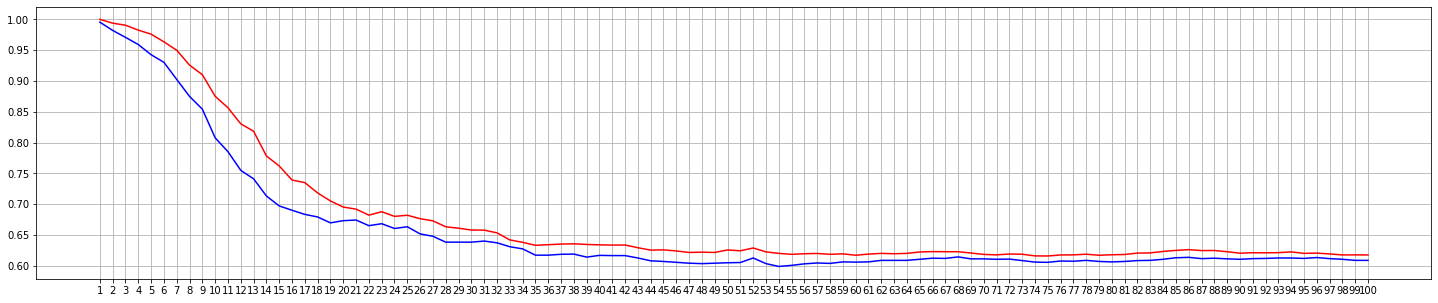

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5)) # 출력할 그래프 크기
plt.plot(range(1, 101), # X데이터 = 1~100
        trainList,  # y데이터
         c="red")
plt.plot(range(1, 101), # X데이터 = 1~100
        testList,  # y데이터
         c="blue")

plt.xticks(range(1,101))
plt.grid() #기준선
plt.show()

In [ ]:
''' 지역 label encoding만 했을때
model1 0.6529 0.6619 0.2961
model2 1 1.0000 0.9923 0.9923
model2 2 0.9953 0.9859 0.9863
model2 3 0.9931 0.9725 0.9749
model2 4 0.9837 0.9620 0.9635
model2 5 0.9757 0.9422 0.9473
model2 6 0.9540 0.9105 0.9045
model2 7 0.9438 0.8912 0.8775
model2 8 0.9238 0.8672 0.8456
model2 9 0.9055 0.8454 0.8104
model3 1.0000 0.5689 0.3833
model3 3 0.6713 0.6766 0.3299
model3 4 0.6848 0.6840 0.3527
model3 5 0.6908 0.6844 0.3459
model3 6 0.7029 0.6816 0.3553
model3 7 0.7192 0.6784 0.3809
model4 1.0000 0.7108 0.3888
model4 3 0.6735 0.6784 0.3267
model4 4 0.6818 0.6858 0.3347
model4 5 0.6955 0.6943 0.3445
model4 6 0.7088 0.6978 0.3479
model4 7 0.7249 0.7024 0.3542
model5 0.7227 0.7017 0.4788
'''
